In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = dd.read_csv("netflix.csv", sep=';', quotechar='"', assume_missing=True)
df = df.dropna(subset=['type'])


In [4]:
print("\n Null Values:")
print(df.isnull().sum().compute())



 Null Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64



🎬 Type Distribution:
Movie      147
TV Show    119
Name: type, dtype: int64


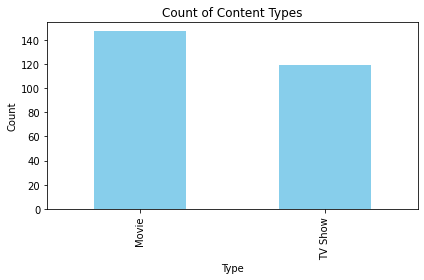

In [5]:
type_counts = df['type'].value_counts().compute()
print("\n🎬 Type Distribution:")
print(type_counts)

type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



🌍 Top 10 Countries by Content:
Pakistan          124
United States      68
Not Given          20
India              12
Japan              12
United Kingdom      7
France              4
Germany             4
South Africa        3
China               2
Name: country, dtype: int64


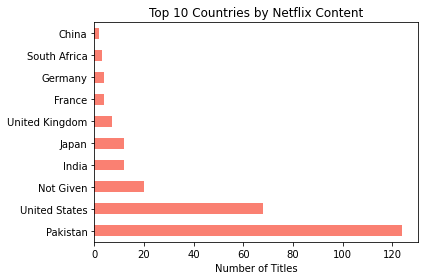

In [6]:
top_countries = df['country'].value_counts().nlargest(10).compute()
print("\n🌍 Top 10 Countries by Content:")
print(top_countries)

top_countries.plot(kind='barh', color='salmon')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()



📅 Content Added Per Year:
2018      3
2019      2
2020     20
2021    241
Name: year_added, dtype: int64


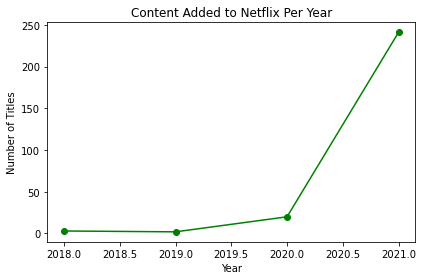

In [9]:

df['date_added'] = dd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# FIXED: compute() first, then sort
yearly_add = df['year_added'].value_counts().compute().sort_index()

print("\n📅 Content Added Per Year:")
print(yearly_add)

# Optional plot
yearly_add.plot(kind='line', marker='o', color='green')
plt.title('Content Added to Netflix Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()



🎭 Top 10 Genres:
International TV Shows      56
Comedies                    45
Dramas                      45
International Movies        42
Action & Adventure          39
Kids' TV                    26
TV Comedies                 25
Docuseries                  25
Children & Family Movies    22
Reality TV                  21
Name: listed_in, dtype: int64


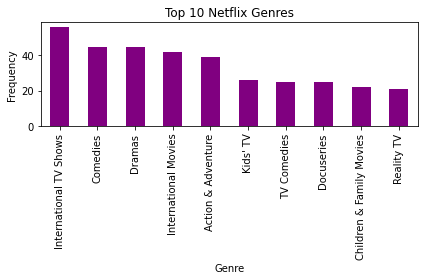

In [10]:
df['listed_in'] = df['listed_in'].fillna('')
genres = df['listed_in'].str.split(', ')
genres = genres.explode()
top_genres = genres.value_counts().nlargest(10).compute()
print("\n🎭 Top 10 Genres:")
print(top_genres)

top_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
